In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../data/raw/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  str    
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long           21

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


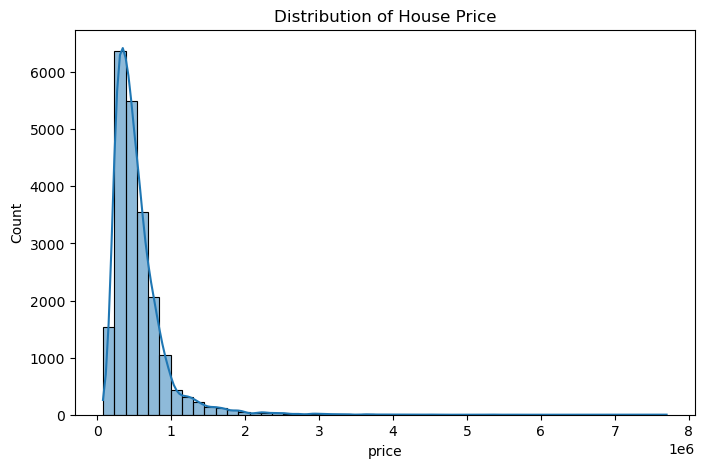

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of House Price")
plt.show()

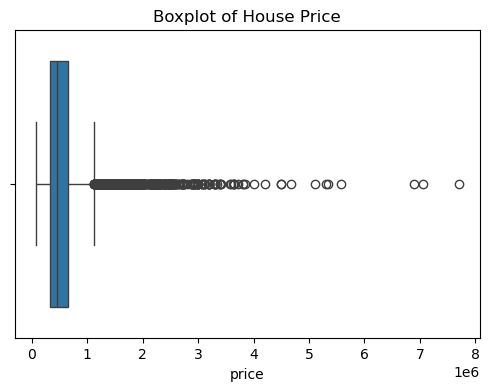

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["price"])
plt.title("Boxplot of House Price")
plt.show()

In [8]:
df_corr = df.drop(columns=["zipcode"])

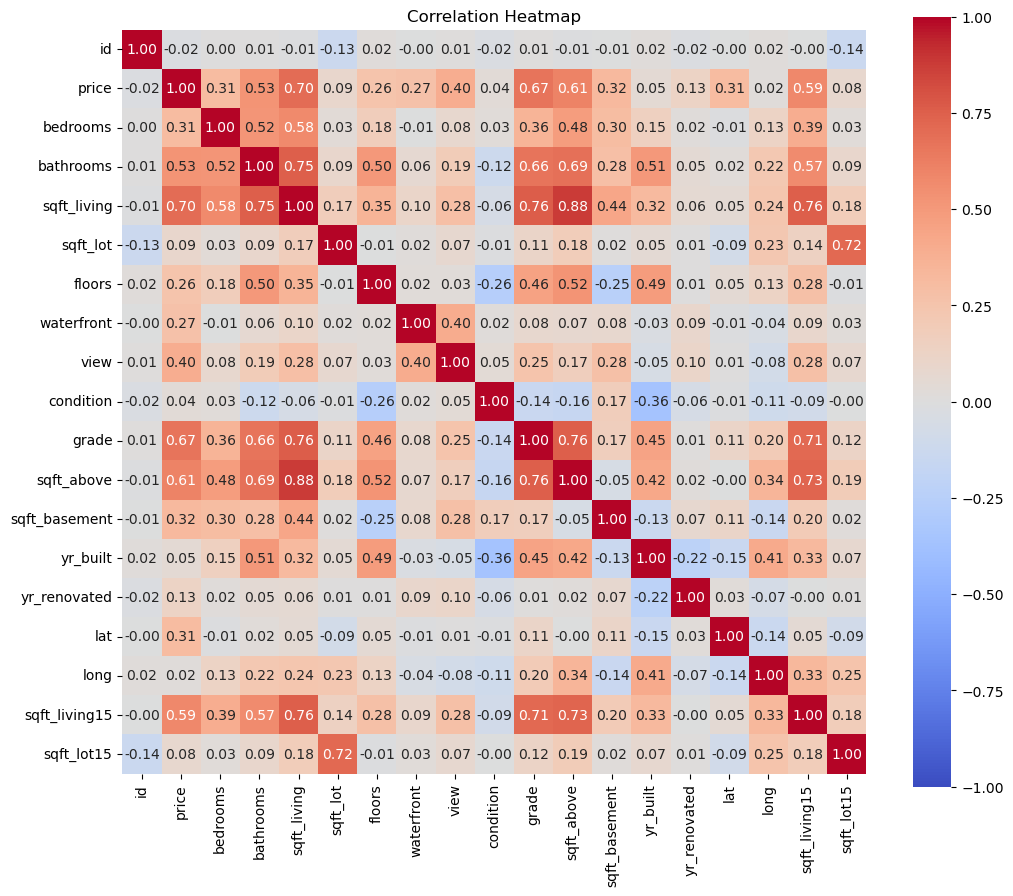

In [9]:
numeric_df = df_corr.select_dtypes(include='number')
corr = numeric_df.corr()

plt.figure(figsize=(12,10))
# sns.heatmap(corr, cmap="coolwarm", center=0)
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, # Set color range from -1 to 1, centered at 0
    cmap='coolwarm',          # Use a divergent colormap
    annot=True,               # Add the correlation numbers (annotations)
    fmt=".2f",                # Format the numbers to two decimal places
    square=True               # Ensure the cells are square
)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
df = df.drop(["id", "date"], axis=1)

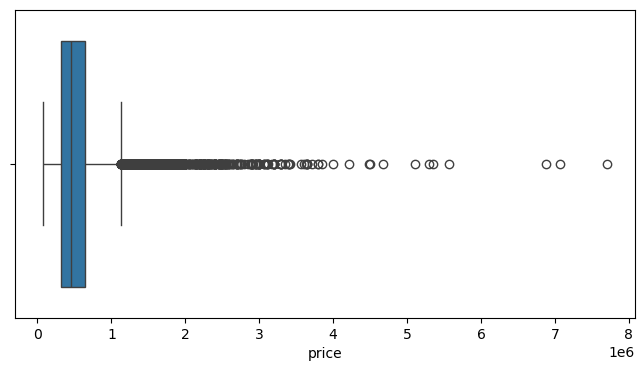

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["price"])
plt.show()

df["price"].describe()

In [12]:
df["price"].skew()

np.float64(4.024069144684714)

Since the target variable shows strong positive skewness (skew = 4.02), log transformation is applied to stabilize variance and approximate normality.

In [13]:
df["price"] = np.log1p(df["price"])

In [14]:
df["price"].skew()

np.float64(0.4280765149574906)

The target variable originally exhibited strong positive skewness (4.02). After applying log transformation, skewness reduced to 0.42, indicating a near-normal distribution.

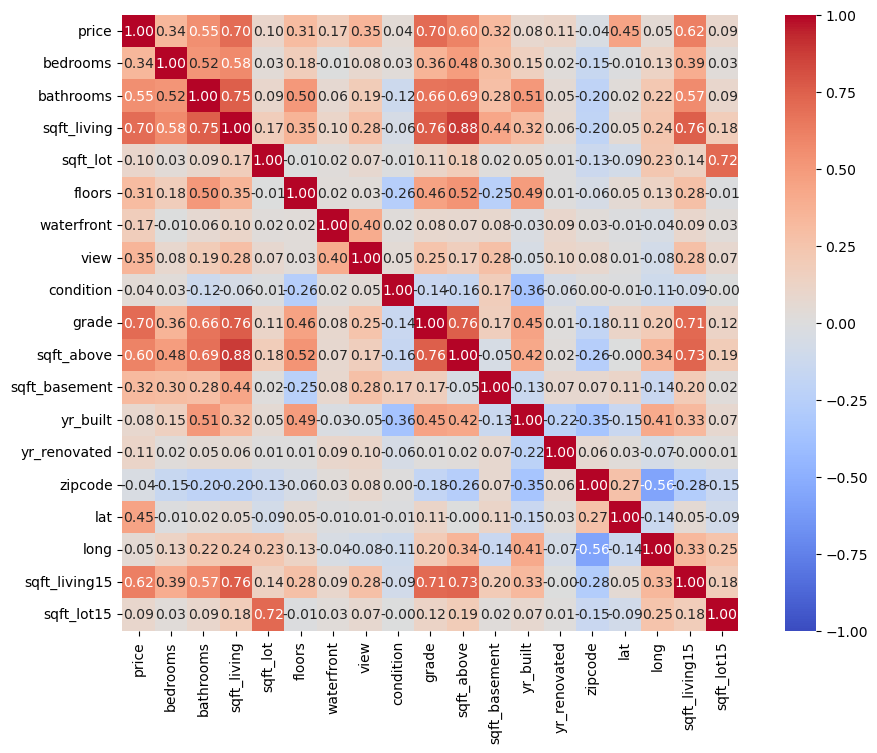

In [15]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, # Set color range from -1 to 1, centered at 0
    cmap='coolwarm',          # Use a divergent colormap
    annot=True,               # Add the correlation numbers (annotations)
    fmt=".2f",                # Format the numbers to two decimal places
    square=True               # Ensure the cells are square
)
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_temp = df.drop("price", axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X_temp.columns
vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i)
                   for i in range(len(X_temp.columns))]

vif_data.sort_values("VIF", ascending=False)


/home/hossein/miniconda3/envs/py314/lib/python3.14/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,sqft_above,inf
2,sqft_living,inf
10,sqft_basement,inf
13,zipcode,1.630845e+06
15,long,1.359553e+06
14,lat,1.390263e+05
11,yr_built,9.588180e+03
8,grade,1.473809e+02
7,condition,3.471167e+01
1,bathrooms,2.861188e+01


Variance Inflation Factor (VIF) was computed to detect multicollinearity among predictors. Features with VIF > 10 were considered problematic.

In [17]:
df = df.drop(["sqft_above", "sqft_basement"], axis=1)

In [ ]:
df = df.drop(["zipcode"], axis=1)

In [18]:
X_temp = df.drop("price", axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X_temp.columns
vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i)
                   for i in range(len(X_temp.columns))]

vif_data.sort_values("VIF", ascending=False)

,feature,VIF
11,zipcode,1.579032e+06
13,long,1.324255e+06
12,lat,1.370046e+05
9,yr_built,9.574883e+03
8,grade,1.447500e+02
7,condition,3.458449e+01
2,sqft_living,3.076093e+01
1,bathrooms,2.789870e+01
14,sqft_living15,2.628780e+01
0,bedrooms,2.327237e+01


In [19]:
df = df.drop(["long"], axis=1)

In [20]:
X_temp = df.drop("price", axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X_temp.columns
vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i)
                   for i in range(len(X_temp.columns))]

vif_data.sort_values("VIF", ascending=False)

,feature,VIF
11,zipcode,158637.333854
12,lat,136616.616594
9,yr_built,9081.476311
8,grade,142.243996
7,condition,34.567953
2,sqft_living,30.690480
1,bathrooms,27.836166
13,sqft_living15,25.540491
0,bedrooms,23.265833
4,floors,13.785435


In [21]:
df["age"] = 2025 - df["yr_built"]
df = df.drop(["yr_built"], axis=1)

In [22]:
X_temp = df.drop("price", axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X_temp.columns
vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i)
                   for i in range(len(X_temp.columns))]

vif_data.sort_values("VIF", ascending=False)

,feature,VIF
11,lat,136488.751654
10,zipcode,135087.911822
8,grade,142.370819
7,condition,34.708631
2,sqft_living,30.683141
1,bathrooms,27.856289
12,sqft_living15,25.501343
0,bedrooms,23.273032
4,floors,13.819304
14,age,9.118539


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
X_train = pd.get_dummies(X_train, columns=["zipcode"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["zipcode"], drop_first=True)

X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)


In [25]:
print(X_train.shape)
print(X_test.shape)

(17290, 83)
(4323, 83)
